In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           sep= ',', header= None)

In [3]:
print( "Dataset Lenght:: ", len(balance_data))
print ("Dataset Shape:: ", balance_data.shape)

Dataset Lenght::  625
Dataset Shape::  (625, 5)


In [4]:
balance_data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [6]:

from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(confusion_matrix(y_test,predictions))

[[ 0  6  7]
 [10 70  5]
 [10  2 78]]


In [14]:
conf_mat = confusion_matrix(y_test,predictions)

In [15]:
conf_mat

array([[ 0,  6,  7],
       [10, 70,  5],
       [10,  2, 78]], dtype=int64)

In [16]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
import graphviz 
from sklearn import tree

In [18]:
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("balance_data") 

'balance_data.pdf'

In [19]:
import numpy as np 
print(balance_data.columns)
#removing the class variable
featureNames = np.delete(balance_data.columns, 0)
featureNames

Int64Index([0, 1, 2, 3, 4], dtype='int64')


Int64Index([1, 2, 3, 4], dtype='int64')

In [20]:
target_names = np.array(list(set(balance_data.values[:,0])))
target_names

array(['B', 'L', 'R'], dtype='<U1')

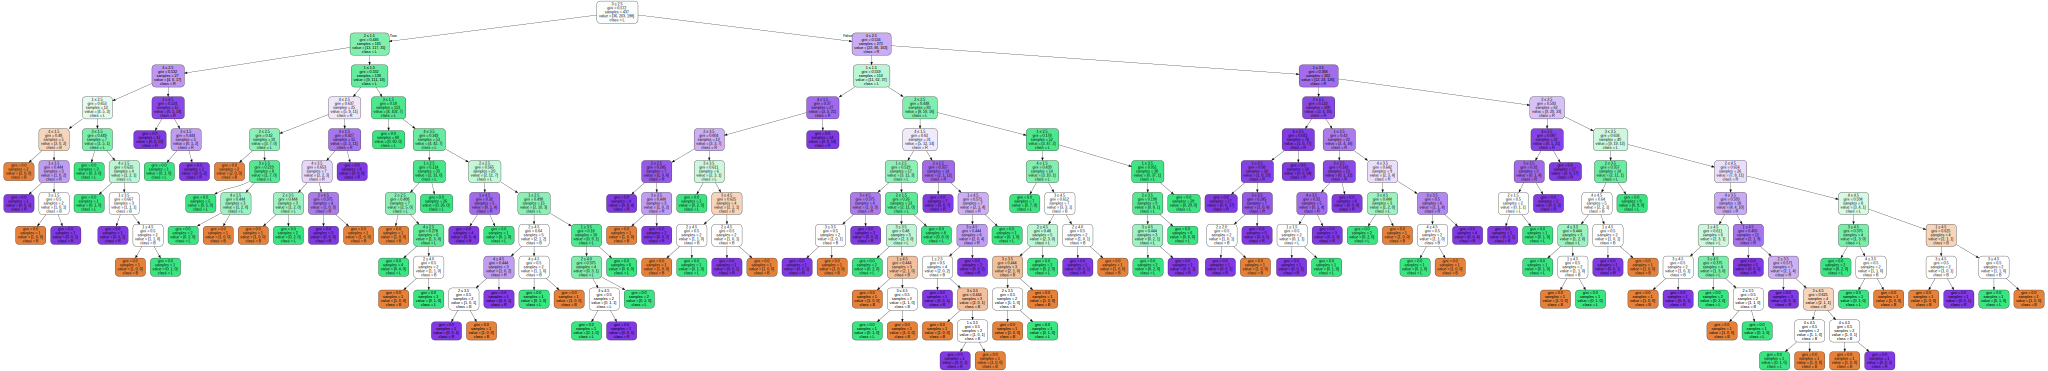

In [21]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                       feature_names=featureNames,  
                       class_names=target_names,  
                       filled=True, rounded=True,  
                       special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 